<a href="https://colab.research.google.com/github/shailzakanwar/HelloGitHubinNitDelhi/blob/main/TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# install the TCA dependency
!git clone https://github.com/ashtonwebster/transferlearning

Cloning into 'transferlearning'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (75/75), done.


In [17]:
cd transferlearning/code/python

[Errno 2] No such file or directory: 'transferlearning/code/python'
/


In [3]:
# install the dependency
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/transferlearning/code/python
  Running setup.py develop for da-tool


In [18]:
cd /content/transferlearning

/content/transferlearning


In [6]:
!git clone https://github.com/ashtonwebster/tl_algs.git


Cloning into 'tl_algs'...
remote: Enumerating objects: 168, done.
remote: Total 168 (delta 0), reused 0 (delta 0), pack-reused 168
Receiving objects: 100% (168/168), 168.12 KiB | 657.00 KiB/s, done.
Resolving deltas: 100% (99/99), done.


In [28]:
cd /content/tl_algs

/content/tl_algs


In [29]:
# install the package!
!python setup.py install

running install
running bdist_egg
running egg_info
creating tl_algs.egg-info
writing tl_algs.egg-info/PKG-INFO
writing dependency_links to tl_algs.egg-info/dependency_links.txt
writing requirements to tl_algs.egg-info/requires.txt
writing top-level names to tl_algs.egg-info/top_level.txt
writing manifest file 'tl_algs.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'tl_algs.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tl_algs
copying tl_algs/__init__.py -> build/lib/tl_algs
copying tl_algs/tca.py -> build/lib/tl_algs
copying tl_algs/tl_baseline.py -> build/lib/tl_algs
copying tl_algs/tnb.py -> build/lib/tl_algs
copying tl_algs/ctl.py -> build/lib/tl_algs
copying tl_algs/burak.py -> build/lib/tl_algs
copying tl_algs/trbag.py -> build/lib/tl_algs
copying tl_algs/tca_plus.py -> build/lib/tl_algs
copying tl_algs/peters.py -> build/lib/tl_algs


In [30]:
! pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/tl_algs
  Attempting uninstall: tl-algs
    Found existing installation: tl-algs 0.1
    Uninstalling tl-algs-0.1:
      Successfully uninstalled tl-algs-0.1
  Running setup.py develop for tl-algs


In [31]:
import tl_algs

In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import random
RAND_SEED = 2016 
random.seed(RAND_SEED) # change this to see new random data!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from sklearn import preprocessing
import numpy as np

#define dataset
#dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/CPDP/ant1.7prop05Ver85.xlsx")
#dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/CPDP/ivy2.0poi3.0.xlsx")
datasetSource = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/jedit 4.3.xlsx")
datasetTarget = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/WPDP/ivy 2.0.xlsx")
#Label Encoding for class column
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
#dataset['Class']=le_class.fit_transform(dataset['Class']
datasetSource['class']= label_encoder.fit_transform(datasetSource['class'])
datasetTarget['class'] = label_encoder.fit_transform(datasetTarget['class'])
##Create independent and dependent  features
columnsSource = datasetSource.columns.tolist()
columnsTarget = datasetTarget.columns.tolist()
##filter the columns to remove data we do not want
columnsSource = [c for c in columnsSource if c not in ["bugs","Version"]]
columnsTarget = [c for c in columnsTarget if c not in ["bugs","Version"]]
##store the variable we are predicting
targetSource="bugs"
targetTarget="bugs"
# define a random state
state = np.random.RandomState(42)
XSource = datasetSource[columnsSource]
ySource = datasetSource[targetSource]
XTarget = datasetTarget[columnsTarget]
yTarget = datasetTarget[targetTarget]
#X_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))

#splitting into train and test without random for prop as target and ant as source
train_data_X = XSource
test_data_X = XTarget
train_data_y = ySource
test_data_y = yTarget
#Print the shape of X & Y
print(XSource.shape)
print(ySource.shape)
print(XTarget.shape)
print(yTarget.shape)

(1079, 26)
(1079,)
(477, 26)
(477,)


In [48]:
train_df=  datasetSource
test_df =  datasetTarget

ValueError: ignored

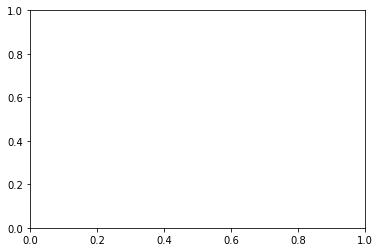

In [77]:
for project in train_df['class'].unique():
    subset = train_df[train_df['class'] == project]
    plt.scatter(subset[columnsSource], subset[targetSource], label="train " + str(project))
plt.scatter(test_df[columnsTarget], test_df[targetTarget], label="bugs")
plt.legend()

In [38]:
for project in train_df.project.unique():
    subset = train_df[train_df.project == project]
    plt.scatter(subset.x, subset.y, label="train " + str(project))
plt.scatter(test_df.x, test_df.y, label="target")
plt.legend()

AttributeError: ignored

In [40]:
from tl_algs import peters, burak

In [55]:
p = peters.Peters(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df, 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df['class'], 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

In [56]:
p.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X)

(      class  version   wmc  dit  noc   cbo    rfc   lcom    ca    ce  ...  \
 0       0.0      4.3   6.0  7.0  0.0   4.0   31.0    1.0   1.0   3.0  ...   
 1       0.0      4.3  18.0  5.0  0.0  16.0   76.0   89.0   5.0  16.0  ...   
 535     0.0      4.3   4.0  1.0  0.0   3.0    5.0    6.0   1.0   2.0  ...   
 690     0.0      4.3   2.0  1.0  0.0   4.0    5.0    0.0   1.0   4.0  ...   
 55      0.0      4.3   5.0  2.0  0.0   2.0   12.0    4.0   1.0   2.0  ...   
 ...     ...      ...   ...  ...  ...   ...    ...    ...   ...   ...  ...   
 1017    0.0      4.3  20.0  5.0  0.0  27.0  144.0  154.0  13.0  22.0  ...   
 1029    0.0      4.3   6.0  1.0  2.0   7.0   19.0    7.0   2.0   5.0  ...   
 1034    0.0      4.3   2.0  1.0  0.0   9.0    2.0    1.0   9.0   0.0  ...   
 1053    0.0      4.3   2.0  1.0  0.0  15.0    2.0    1.0  14.0   1.0  ...   
 1071    0.0      4.3   8.0  1.0  0.0  15.0   76.0    0.0   3.0  13.0  ...   
 
        ic   cbm         amc    nr  ndc     nml  ndpv  max(cc)

In [60]:
b = burak.Burak(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df, 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df['class'], 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

In [61]:
b.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X, 3)[0]

,class,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,...,ic,cbm,amc,nr,ndc,nml,ndpv,max(cc),avg(cc),bugs
620,0.0,4.3,5.0,3.0,0.0,6.0,23.0,8.0,5.0,2.0,...,0.0,0.0,18.600000,0.0,0.0,0.0,0.0,1.0,0.600000,0.0
446,0.0,4.3,4.0,1.0,0.0,7.0,24.0,0.0,2.0,6.0,...,0.0,0.0,26.000000,0.0,0.0,0.0,0.0,4.0,1.500000,0.0
132,0.0,4.3,4.0,1.0,0.0,7.0,24.0,0.0,2.0,6.0,...,0.0,0.0,26.000000,0.0,0.0,0.0,0.0,4.0,1.500000,0.0
908,0.0,4.3,5.0,1.0,0.0,4.0,33.0,0.0,0.0,4.0,...,0.0,0.0,30.800000,2.0,1.0,0.0,0.0,3.0,1.600000,0.0
0,0.0,4.3,6.0,7.0,0.0,4.0,31.0,1.0,1.0,3.0,...,3.0,4.0,25.000000,0.0,0.0,0.0,0.0,2.0,1.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0.0,4.3,2.0,1.0,0.0,1.0,4.0,0.0,1.0,1.0,...,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.500000,0.0
498,0.0,4.3,2.0,1.0,0.0,1.0,4.0,0.0,1.0,1.0,...,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.500000,0.0
430,0.0,4.3,4.0,3.0,0.0,1.0,8.0,4.0,1.0,0.0,...,2.0,2.0,18.500000,3.0,2.0,0.0,0.0,1.0,0.750000,0.0
47,0.0,4.3,7.0,6.0,19.0,22.0,18.0,15.0,22.0,3.0,...,0.0,0.0,8.571428,3.0,2.0,5.0,0.0,1.0,0.714286,0.0
